# EN2550 Assignment 1 on Intensity Transformations and Neighborhood Filtering


### Index No. : 190696U

### Name : Wijegunawardana C.H.W.

1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

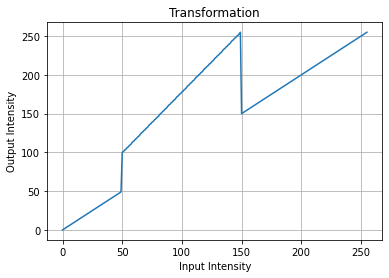

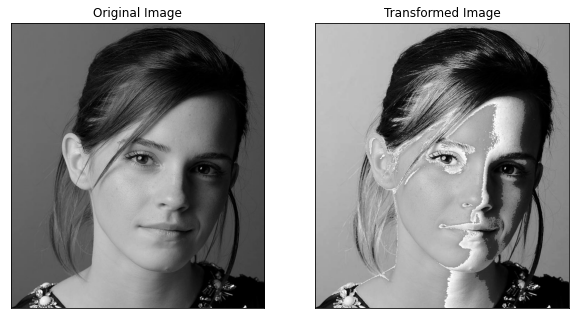

In [2]:
# Import Image
img1 = cv.imread('Images/emma_gray.jpg', cv.IMREAD_ANYCOLOR)
assert img1 is not None

# Generate the transformation
transform = np.arange(0, 256, dtype = np.uint8)
transform[:50] = np.linspace(0, 50, 50, endpoint = False)
transform[50:150] = np.linspace(100, 255, 100, endpoint = True)
transform[150:256] = np.linspace(150, 255, 106, endpoint = True)

# Plot the transformation
plt.plot(transform)
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.title("Transformation")

# Apply the transformation to the image
trans_img1 = cv.LUT(img1,transform)

# Plot the original and the transfromed image
fig,ax = plt.subplots(1,2,figsize = (10,10))
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(trans_img1, cv.COLOR_BGR2RGB))
ax[1].set_title("Transformed Image")
for i in range(2):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

### Observation

By this transformation, the pixels that have a gray-scale value between 50-150 are emphasized by increasing their intensity compared to other pixels. Therefore, those pixels with gray-scale value between 50-150 have become more white in the transformed image.

2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots.

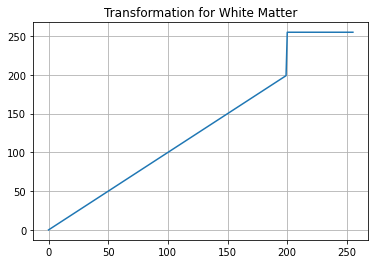

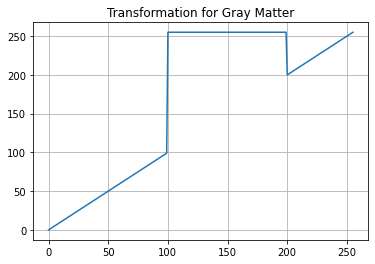

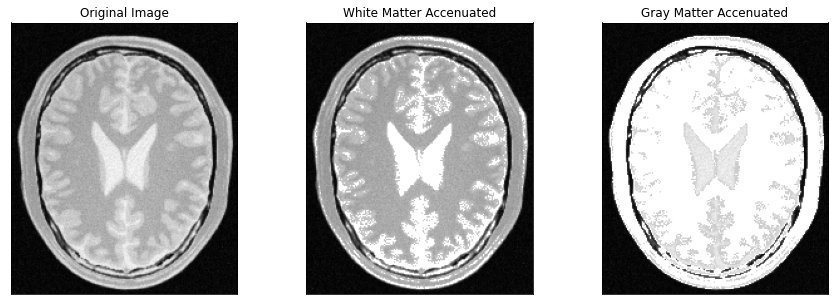

In [3]:
# Import the image
img2 = cv.imread('Images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img2 is not None

# Transformation for white matter
transform_white = np.arange(0, 256, dtype = np.uint8)
transform_white[:200] = np.linspace(0, 200, 200, endpoint = False)
transform_white[200:256] = 255

# Plot the transformation
figure, axis = plt.subplots()
axis.plot(transform_white)
axis.grid(True)
axis.set_title("Transformation for White Matter")

# Transformation for gray matter
transform_gray = np.arange(0, 256, dtype = np.uint8)
transform_gray[:100] = np.linspace(0, 100, 100, endpoint = False)
transform_gray[100:200] = 255 #np.linspace(100, 255, 130, endpoint = True)
transform_gray[200:256] = np.linspace(200, 255, 56, endpoint = True)

# Plot the transformation
figure, axis = plt.subplots()
axis.plot(transform_gray)
axis.grid(True)
axis.set_title("Transformation for Gray Matter")

# Apply the transformation to the image
white_img2 = cv.LUT(img2,transform_white)
gray_img2 = cv.LUT(img2,transform_gray)

# Plot the original and the transfromed image
fig,ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(img2, cmap = 'gray')
ax[0].set_title("Original Image")
ax[1].imshow(white_img2, cmap = 'gray')
ax[1].set_title("White Matter Accenuated")
ax[2].imshow(gray_img2, cmap = 'gray')
ax[2].set_title("Gray Matter Accenuated")
for i in range(3):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

To accenuate the white matter, the transformation is designed such that the output will have absolute white in near white pixels for better visualization. The near white grayscale range is selected as 200-255.

To accenuate the gray matter, the transformation is designed such that the output will have absolute white in gray pixels for better visualization. The gray grayscale range is selected as 50-200.

In both cases, the undesirable gray levels are remained in their original grayscale level.

3. Consider the image shown in Fig. 3.

(a) Apply gamma correction to the L plane in the L
∗a
∗b
∗ color space and state the γ value.

(b) Show the histograms of the original and corrected images

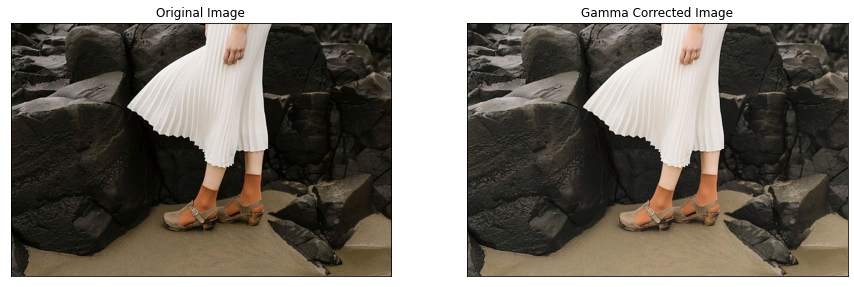

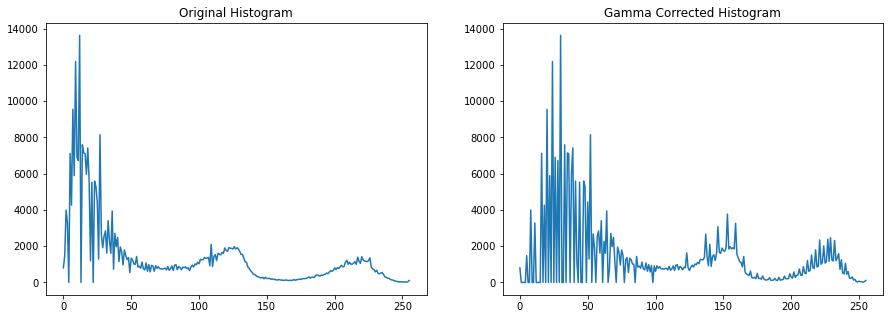

In [4]:
# Import the image
img3 = cv.imread('Images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img3 is not None

# Convert to L*a*b* color space
img3 = cv.cvtColor(img3, cv.COLOR_BGR2Lab)

gamma = 0.7
# Apply gamma correction
transform = np.array([(p/255)**gamma*255 for p in range(256)]).astype(np.uint8)
L_field = cv.LUT(img3[:,:,0],transform).reshape(480,720,1) # Applying Gamma correction to only the L field
corrected = np.concatenate([L_field,img3[:,:,1:]],-1) # Reconstruct the image

# Plot the original and the transfromed image
fig,ax = plt.subplots(1,2,figsize = (15,5))
ax[0].imshow(cv.cvtColor(img3, cv.COLOR_Lab2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(corrected, cv.COLOR_Lab2RGB))
ax[1].set_title("Gamma Corrected Image")
for i in range(2):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

fig,ax = plt.subplots(1,2,figsize = (15,5))
# Original Histogram
histogram_ori = cv.calcHist([img3],[0],None,[256],[0,256])
ax[0].plot(histogram_ori)
ax[0].set_title("Original Histogram")

# Corrected Histogram
histogram_cor = cv.calcHist([corrected],[0],None,[256],[0,256])
ax[1].plot(histogram_cor)
ax[1].set_title("Gamma Corrected Histogram")
plt.show()

Gamma Value = 0.7

4. Write a function of your own to carry out histogram equalization on the image shown in Fig. 4. Show the
histograms before and after equalization.

Equalizing the histogram of an image is accomplished by calculating the cumulative distributive function of the original histogram and normalizing it to values between 0-255. this effectively spreads out the concentrated areas of the histograms within the range 0-255.

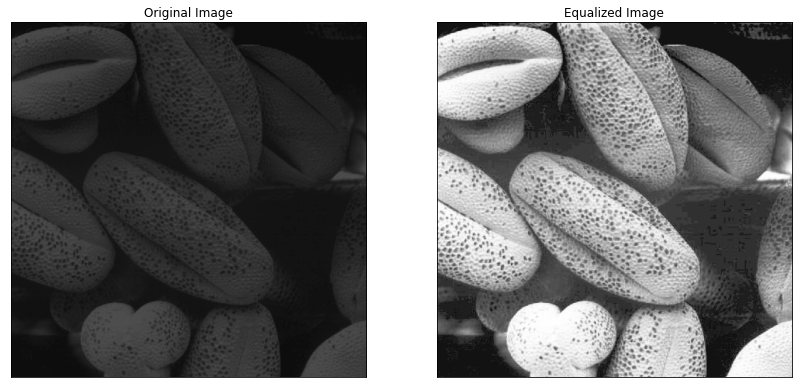

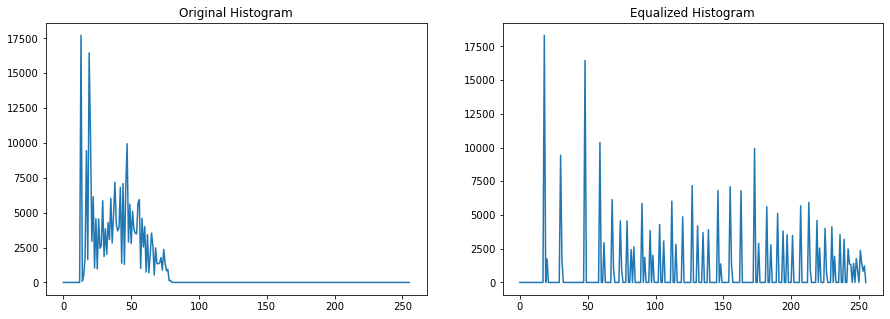

In [5]:
# Import the image
img4 = cv.imread('Images/shells.png', cv.IMREAD_GRAYSCALE)
assert img4 is not None

# Equalize Image
histogram_ori = cv.calcHist([img4],[0],None,[256],[0,256]) # Find the original histogram
cdf_hist = np.cumsum(histogram_ori)                        # Calculate the cumulative function of the histogram
normalized_hist = (cdf_hist * 255 / cdf_hist.max()).astype(int) # Normalize the cdf such that the sum is 255
equalized = cv.LUT(img4, normalized_hist).astype('uint16') # Apply the normalized cdf as an LUT to the image

# Plot the original and the transfromed image
fig,ax = plt.subplots(1,2,figsize = (14,14))
ax[0].imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(equalized, cv.COLOR_BGR2RGB))
ax[1].set_title("Equalized Image")
for i in range(2):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

fig,ax = plt.subplots(1,2,figsize = (15,5))
# Original Histogram
ax[0].plot(histogram_ori)
ax[0].set_title("Original Histogram")

# Equalized Histogram
equalized_hist = cv.calcHist([equalized],[0],None,[256],[0,256])
ax[1].plot(equalized_hist)
ax[1].set_title("Equalized Histogram")
plt.show()

5. Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image,
which can handle
(a) nearest-neighbor, and
(b) bilinear interpolation.
I have included four images, two large originals, and there zoomed-out versions. Test you algorithm by
computing the normalized sum of squared difference (SSD) when you scale-up the given small images by a
factor of 4 by comparing with the original images.

In [6]:
# Import the large original images
img51 = cv.imread('Images/a1q5images/im01.png', cv.IMREAD_ANYCOLOR)
assert img51 is not None
img52 = cv.imread('Images/a1q5images/im02.png', cv.IMREAD_ANYCOLOR)
assert img52 is not None
img53 = cv.imread('Images/a1q5images/im03.png', cv.IMREAD_ANYCOLOR)
assert img53 is not None

# Import the zoomed-out images
img51_s = cv.imread('Images/a1q5images/im01small.png', cv.IMREAD_ANYCOLOR)
assert img51_s is not None
img52_s = cv.imread('Images/a1q5images/im02small.png', cv.IMREAD_ANYCOLOR)
assert img52_s is not None
img53_s = cv.imread('Images/a1q5images/im03small.png', cv.IMREAD_ANYCOLOR)
assert img53_s is not None

In [7]:
def zoom_nearest_neighbour(scale, image):
    rows = int(scale*image.shape[0])
    columns = int(scale*image.shape[1])
    
    zoomed = np.zeros((rows,columns,3),dtype = image.dtype)
    for i in range(rows):
        for j in range(columns):
            zoomed[i,j] = image[int(i/scale),int(j/scale)]
    return zoomed

In [8]:
def zoom_bilinear_interpolation(scale, image):
    rows = int(scale*image.shape[0])
    columns = int(scale*image.shape[1])
    
    zoomed = cv.resize(image,(columns,rows),interpolation = cv.INTER_LINEAR)
    return zoomed

Original Image 1:  (270, 480, 3)
Original Image 2:  (300, 480, 3)
Original Image 3:  (365, 600, 3)
Zoomed Image 1:  (1080, 1920, 3)
Zoomed Image 2:  (1200, 1920, 3)
Zoomed Image 3:  (1460, 2400, 3)


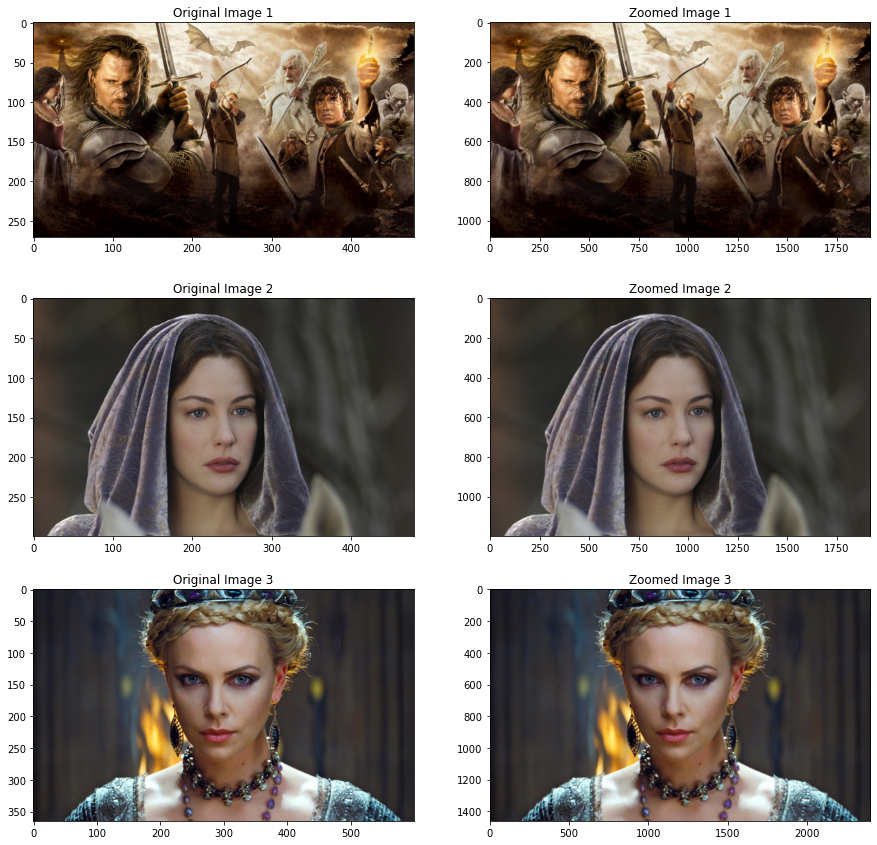

In [9]:
scale = 4
# Apply nearest neighbour zoom by factor 4 to all 3 small images
img51_zn = zoom_nearest_neighbour(scale, img51_s)
img52_zn = zoom_nearest_neighbour(scale, img52_s)
img53_zn = zoom_nearest_neighbour(scale, img53_s)
print("Original Image 1: ",img51_s.shape)
print("Original Image 2: ",img52_s.shape)
print("Original Image 3: ",img53_s.shape)
print("Zoomed Image 1: ",img51_zn.shape)
print("Zoomed Image 2: ",img52_zn.shape)
print("Zoomed Image 3: ",img53_zn.shape)

# Plotting in openCV Windows
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img51_s)
cv.waitKey(0)
cv.destroyAllWindows()
# Plotting in openCV Windows
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img51_zn)
cv.waitKey(0)
cv.destroyAllWindows()

# Plot the original and the zoomed image
fig,ax = plt.subplots(3,2, figsize = (15,15))
ax[0,0].imshow(cv.cvtColor(img51_s, cv.COLOR_BGR2RGB))
ax[0,0].set_title("Original Image 1")
ax[1,0].imshow(cv.cvtColor(img52_s, cv.COLOR_BGR2RGB))
ax[1,0].set_title("Original Image 2")
ax[2,0].imshow(cv.cvtColor(img53_s, cv.COLOR_BGR2RGB))
ax[2,0].set_title("Original Image 3")
ax[0,1].imshow(cv.cvtColor(img51_zn, cv.COLOR_BGR2RGB))
ax[0,1].set_title("Zoomed Image 1")
ax[1,1].imshow(cv.cvtColor(img52_zn, cv.COLOR_BGR2RGB))
ax[1,1].set_title("Zoomed Image 2")
ax[2,1].imshow(cv.cvtColor(img53_zn, cv.COLOR_BGR2RGB))
ax[2,1].set_title("Zoomed Image 3")
plt.show()

In [10]:
# Calculating SSD for nearest neighbour zooming
ssd_1 = np.sum(((img51[:,:]-img51_zn[:,:])**2)/(3*255**2))/(img51.shape[0]*img51.shape[1])
ssd_2 = np.sum(((img52[:,:]-img52_zn[:,:])**2)/(3*255**2))/(img52.shape[0]*img52.shape[1])

print("SSD for Image 1:", ssd_1)
print("SSD for Image 2:", ssd_2)

SSD for Image 1: 0.0004811121335890121
SSD for Image 2: 0.0001830374980420635


Original Image 1:  (270, 480, 3)
Original Image 2:  (300, 480, 3)
Original Image 3:  (365, 600, 3)
Zoomed Image 1:  (1080, 1920, 3)
Zoomed Image 2:  (1200, 1920, 3)
Zoomed Image 3:  (1460, 2400, 3)


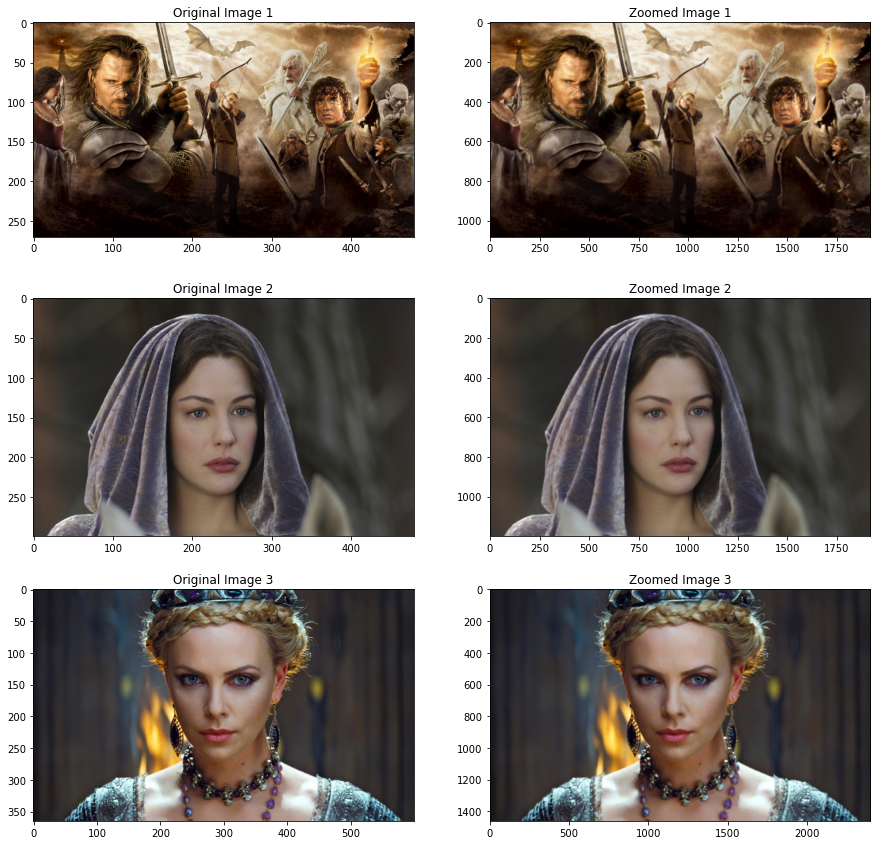

In [11]:
scale = 4
# Apply bilinear interpolation zoom by factor 4 to all 3 small images
img51_zb = zoom_bilinear_interpolation(scale, img51_s)
img52_zb = zoom_bilinear_interpolation(scale, img52_s)
img53_zb = zoom_bilinear_interpolation(scale, img53_s)
print("Original Image 1: ",img51_s.shape)
print("Original Image 2: ",img52_s.shape)
print("Original Image 3: ",img53_s.shape)
print("Zoomed Image 1: ",img51_zb.shape)
print("Zoomed Image 2: ",img52_zb.shape)
print("Zoomed Image 3: ",img53_zb.shape)

# Plotting in openCV Windows
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img51_s)
cv.waitKey(0)
cv.destroyAllWindows()
# Plotting in openCV Windows
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img51_zb)
cv.waitKey(0)
cv.destroyAllWindows()

# Plot the original and the zoomed image
fig,ax = plt.subplots(3,2, figsize = (15,15))
ax[0,0].imshow(cv.cvtColor(img51_s, cv.COLOR_BGR2RGB))
ax[0,0].set_title("Original Image 1")
ax[1,0].imshow(cv.cvtColor(img52_s, cv.COLOR_BGR2RGB))
ax[1,0].set_title("Original Image 2")
ax[2,0].imshow(cv.cvtColor(img53_s, cv.COLOR_BGR2RGB))
ax[2,0].set_title("Original Image 3")
ax[0,1].imshow(cv.cvtColor(img51_zb, cv.COLOR_BGR2RGB))
ax[0,1].set_title("Zoomed Image 1")
ax[1,1].imshow(cv.cvtColor(img52_zb, cv.COLOR_BGR2RGB))
ax[1,1].set_title("Zoomed Image 2")
ax[2,1].imshow(cv.cvtColor(img53_zb, cv.COLOR_BGR2RGB))
ax[2,1].set_title("Zoomed Image 3")
plt.show()

In [12]:
# Calculating SSD for bilinear interpolation zooming
ssd_1 = np.sum(((img51[:,:]-img51_zb[:,:])**2)/(3*255**2))/(img51.shape[0]*img51.shape[1])
ssd_2 = np.sum(((img52[:,:]-img52_zb[:,:])**2)/(3*255**2))/(img52.shape[0]*img52.shape[1])

print("SSD for Image 1:", ssd_1)
print("SSD for Image 2:", ssd_2)

SSD for Image 1: 0.0004775562417232688
SSD for Image 2: 0.00016429053061856538


### Observation

When nearest neighbour zooming is used, the zoomed image has a pixelated look becuase there are duplicated pixels. But when bilinear interpolation is used, the zoomed image looks more smoother without being pixelated. The SSD is lower in bilinear interpolation when compared to nearest neighbour zooming.

6. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 5 [3]
(a) Using the existing filter2D to Sobel filter the image.
(b) Write your own code to Sobel filter the image.
(c) Using the property carry out Sobel filtering.

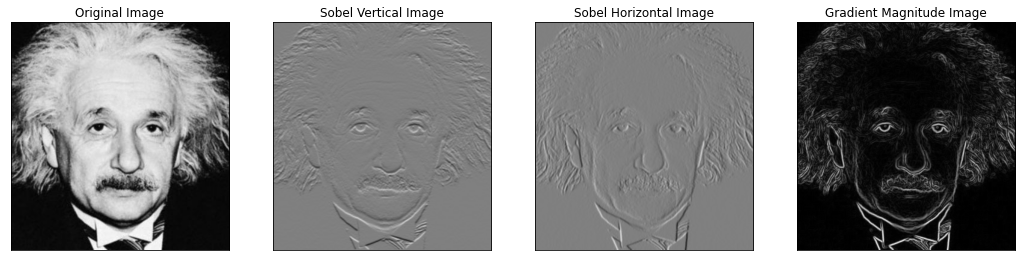

In [13]:
# Importing the image
img6 = cv.imread('Images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img6 is not None

# Sobel Vertical Kernel
sobel_ver = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
img_x = cv.filter2D(img6, -1, sobel_ver)

# Sobel Horizontal Kernel
sobel_hor = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)
img_y = cv.filter2D(img6, -1, sobel_hor)

# Gradient Magnitude Kernel
img_grad = np.sqrt(img_x**2 + img_y**2)

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(img6, cmap = 'gray',vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[1].imshow(img_x, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[1].set_title("Sobel Vertical Image")
ax[2].imshow(img_y, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[2].set_title("Sobel Horizontal Image")
ax[3].imshow(img_grad, cmap = 'gray')
ax[3].set_title("Gradient Magnitude Image")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

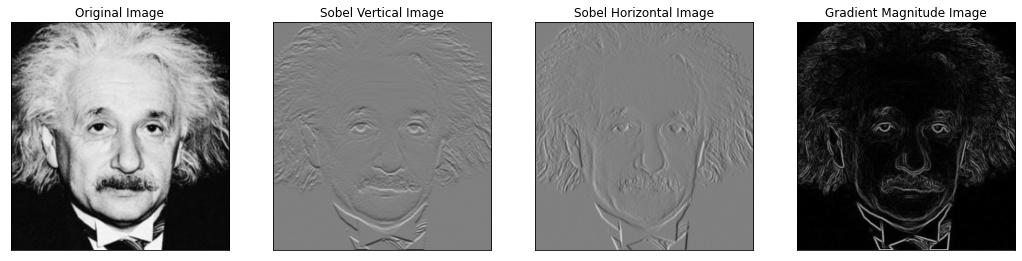

In [14]:
# Importing the image
img6_m = cv.imread('Images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img6_m is not None

# Sobel Vertical Kernel
sobel_ver_m = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype=np.float32)
# Sobel Horizontal Kernel
sobel_hor_m = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32)

img_xm = np.zeros(img6_m.shape)
img_ym = np.zeros(img6_m.shape)
rows, columns = img6_m.shape

# Carry out padding
padding = 0
padded = np.full((rows + 2, columns + 2), padding, dtype=np.uint8)

# copy img image into center of result image
padded[1:rows + 1, 1:columns + 1] = img6_m

for i in range(rows):
    for j in range(columns):
        img_ym[i,j] = np.sum(np.multiply(sobel_hor_m, padded[i:i + 3, j:j + 3]))
        
for i in range(rows):
    for j in range(columns):
        img_xm[i,j] = np.sum(np.multiply(sobel_ver_m, padded[i:i + 3, j:j + 3]))
              
# Gradient Magnitude Kernel
img_grad_m = np.sqrt(img_xm**2 + img_ym**2)

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(img6_m, cmap = 'gray',vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[1].imshow(img_xm, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[1].set_title("Sobel Vertical Image")
ax[2].imshow(img_ym, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[2].set_title("Sobel Horizontal Image")
ax[3].imshow(img_grad_m, cmap = 'gray')
ax[3].set_title("Gradient Magnitude Image")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

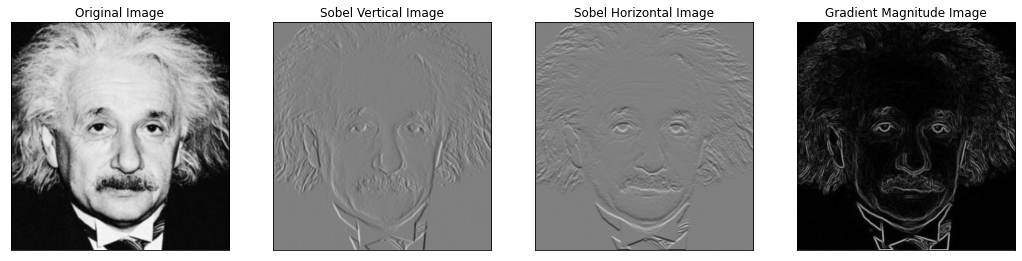

In [23]:
import scipy.signal as sig

# Importing the image
img6_p = cv.imread('Images/einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img6_p is not None

img_xp_1 = np.zeros(img6_p.shape) # Intermediate Image
img_xp = np.zeros(img6_p.shape)   # Final Image
img_yp_1 = np.zeros(img6_p.shape)
img_yp = np.zeros(img6_p.shape)

# Sobel Vertical Kernel
sobel_ver_array1 = np.array([[1],[2],[1]])
sobel_ver_array2 = np.array([[1,0,-1]])

# Sobel Horizontal Kernel
sobel_hor_array1 = np.array([[1],[0],[-1]])
sobel_hor_array2 = np.array([[1,2,1]])

img_xp_1 = sig.convolve2d(img6_p, sobel_ver_array1, mode="same")
img_xp = sig.convolve2d(img_xp_1, sobel_ver_array2, mode="same")
img_yp_1 = sig.convolve2d(img6_p, sobel_hor_array1, mode="same")
img_yp = sig.convolve2d(img_yp_1, sobel_hor_array2, mode="same")
        
# Gradient Magnitude Kernel
img_grad_p = np.sqrt(img_xp**2 + img_yp**2)

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(img6_p, cmap = 'gray',vmin = 0, vmax = 255)
ax[0].set_title("Original Image")
ax[1].imshow(img_xp, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[1].set_title("Sobel Vertical Image")
ax[2].imshow(img_yp, cmap = 'gray',vmin = -1020, vmax = 1020)
ax[2].set_title("Sobel Horizontal Image")
ax[3].imshow(img_grad_p, cmap = 'gray')
ax[3].set_title("Gradient Magnitude Image")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

7. Fig. 6 shows a flower image with both the foreground and background are in focus. 

(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
background image.

(b) Produce an enhanced image with a substantially blurred background. Display the original image
alongside the enhanced image.


(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?

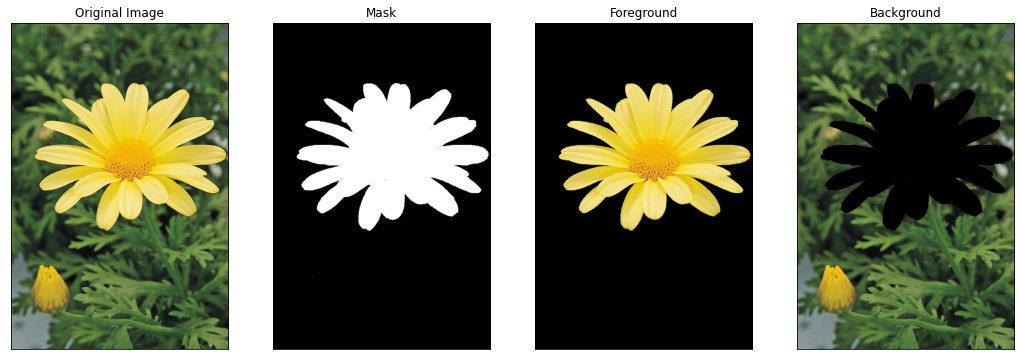

In [16]:
# Importing the image
img7 = cv.imread('Images/daisy.jpg', cv.IMREAD_ANYCOLOR)
assert img7 is not None

mask = np.zeros(img7.shape[:2], dtype="uint8") # Mask - an empty image to store the mask
rect = (40, 150, 560, 500) # Defining the rectangle that contains the object

fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")

# Apply GrabCut using the the bounding box segmentation method
(mask, bgModel, fgModel) = cv.grabCut(img7, mask, rect, bgModel, fgModel, 5, mode=cv.GC_INIT_WITH_RECT)

# Mask for the foreground
fore_mask = (mask == cv.GC_PR_FGD).astype("uint8") * 255
outputMask_fore = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD), 0, 1)
outputMask_fore = (outputMask_fore * 255).astype("uint8")
foreground = cv.bitwise_and(img7, img7, mask=outputMask_fore) # Foreground Image

# Mask for the background
back_mask = (mask == cv.GC_PR_BGD).astype("uint8") * 255
outputMask_back = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 0, 1)
outputMask_back = (outputMask_back * 255).astype("uint8")
background = cv.bitwise_and(img7, img7, mask=outputMask_back) # Background Image

# Plot original image
fig,ax = plt.subplots(1,4,figsize = (18,6))
ax[0].imshow(cv.cvtColor(img7, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(fore_mask, cv.COLOR_BGR2RGB))
ax[1].set_title("Mask")
ax[2].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground")
ax[3].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[3].set_title("Background")

for i in range(4):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

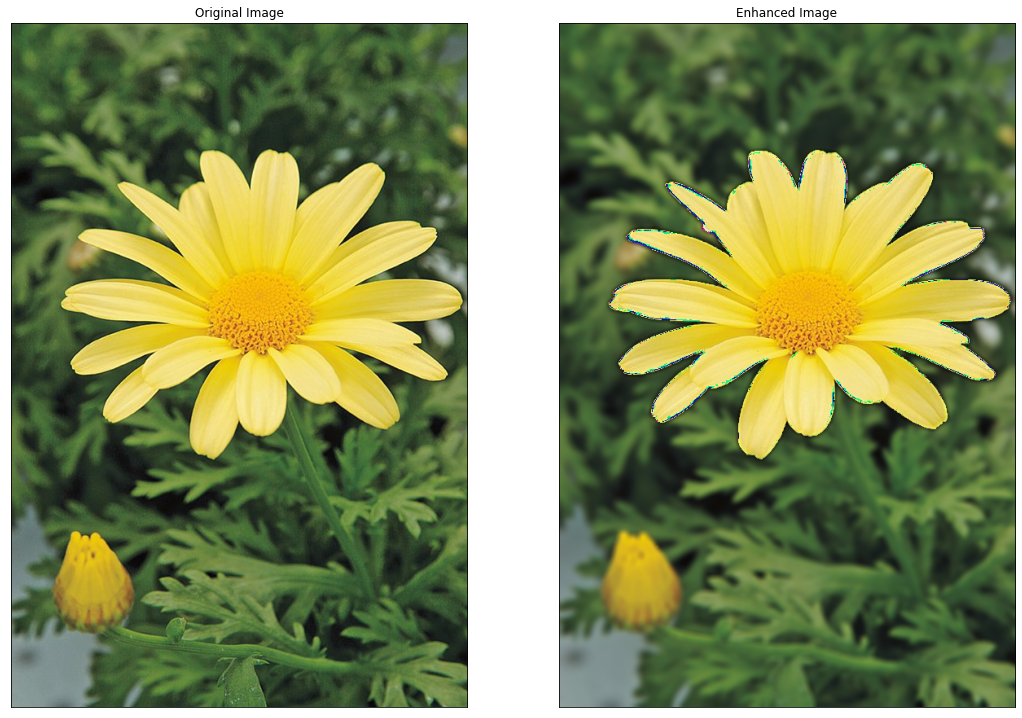

In [21]:
enhanced = np.clip(np.add(foreground, cv.GaussianBlur(background, (9,9), 4)), 0, 255)
# enhanced = np.clip(np.add(foreground,background), 0, 255)

# Plot original image
fig,ax = plt.subplots(1,2,figsize = (18,18))
ax[0].imshow(cv.cvtColor(img7, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")

for i in range(2):
    ax[i].set_xticks([]), ax[i].set_yticks([])
plt.show()

### The reason for dark edges in the enhnaced image

Because when performing grabCut there might be some pixels around the edge of the which probably belongs to both foreground and the background. Therefore, when the two images are added, those pixels at the edge are added together and clipped below 255. Therefore, they appear dark.